In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv(r"C:\Users\Samiksha\Desktop\New folder\books.csv", on_bad_lines='skip')
    
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [19]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [23]:
df2 = df.copy()

In [24]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [25]:
rating=pd.get_dummies(df2['rating_between'])
lang=pd.get_dummies(df2['language_code'])

In [26]:
features = pd.concat([rating,
                      lang,
                      df2['average_rating'],
                      df2['ratings_count']
    
], axis=1)

In [27]:
scaler=MinMaxScaler()

In [28]:
features=scaler.fit_transform(features)

In [29]:
model=neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [30]:
book='Harry Potter and the Half-Blood Prince (Harry Potter  #6)'

In [31]:
id_b=df2[df2['title']==book].index

In [32]:
id_b=id_b[0]

In [33]:
id_b

0

In [34]:
books=[]

In [35]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name

In [36]:
new_books=BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')

In [37]:
new_books

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']

In [38]:
#Graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Samiksha\Desktop\New folder\books.csv", on_bad_lines='skip')

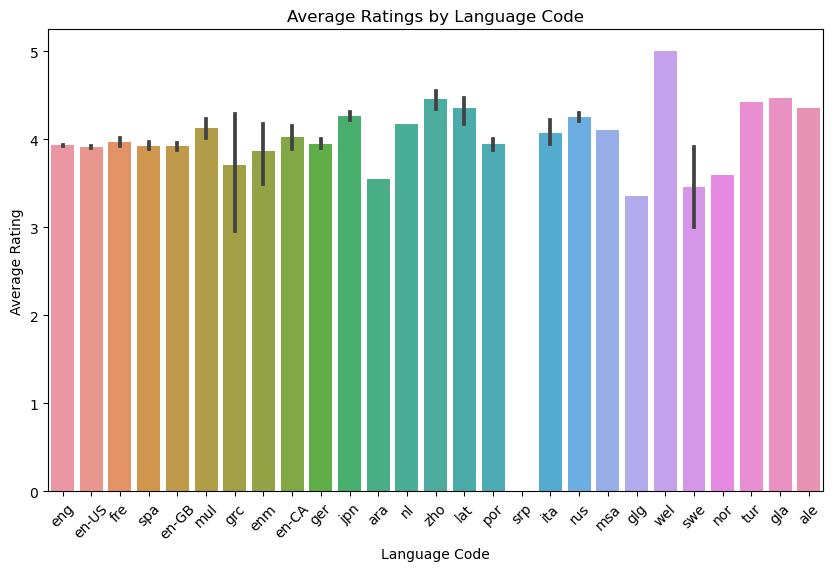

In [40]:
# Bar plot showing average ratings by language code
plt.figure(figsize=(10, 6))
sns.barplot(x='language_code', y='average_rating', data=df)
plt.title('Average Ratings by Language Code')
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


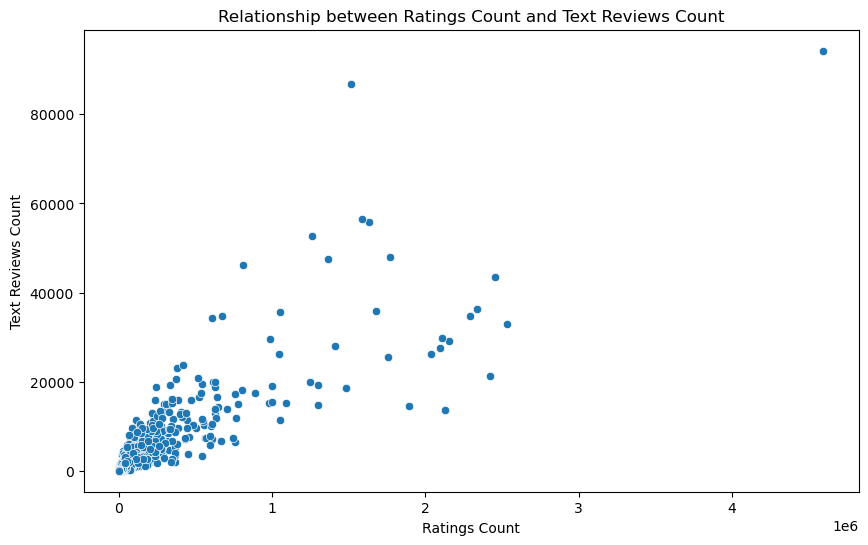

In [41]:
# Scatter plot showing the relationship between ratings count and text reviews count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings_count', y='text_reviews_count', data=df)
plt.title('Relationship between Ratings Count and Text Reviews Count')
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.show()


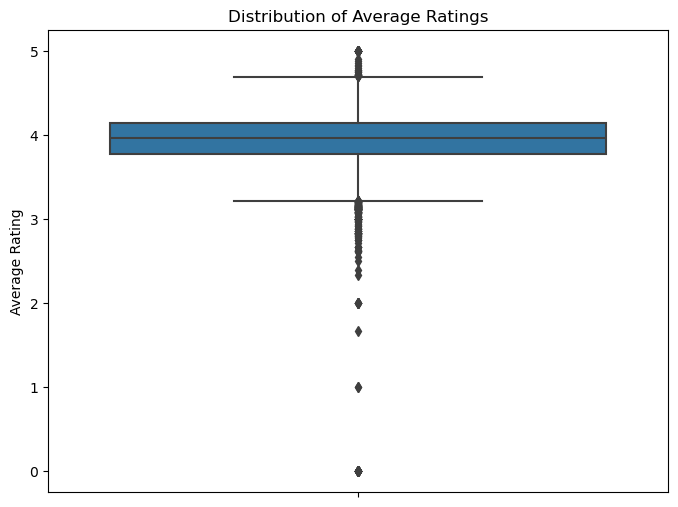

In [42]:
# Box plot showing the distribution of average ratings
plt.figure(figsize=(8, 6))
sns.boxplot(y='average_rating', data=df)
plt.title('Distribution of Average Ratings')
plt.ylabel('Average Rating')
plt.show()